In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import csv

In [2]:
import os

# Download the data from our GitLab page
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018-toelichting.csv
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018.csv

data_directory = os.path.join('/content/')

--2023-11-21 10:09:27--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018-toelichting.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3375 (3.3K) [text/plain]
Saving to: ‘kwb-2018-toelichting.csv’

kwb-2018-toelichtin 100%[===================>]   3.30K  --.-KB/s    in 0s      

2023-11-21 10:09:28 (60.5 MB/s) - ‘kwb-2018-toelichting.csv’ saved [3375/3375]

--2023-11-21 10:09:28--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3774153 (3.6M) [text/plain]
Saving to: ‘kwb-2018.csv’

kwb-2018.csv        100%[===================>]   3.60M  --.-KB/s    in 0.09s   

2023-11-2

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
# bigger plots
plt.rcParams['figure.figsize'] = [20, 15]

#### Read CBS data: CBS 'gemeente / wijk / buurt statistieken'

In [5]:
column_reference_table = {}
with open(os.path.join(data_directory, "kwb-2018-toelichting.csv")) as file:
    reader = csv.reader(file, delimiter=';')
    for row in reader:
        column_reference_table[row[0]] = row[1]

In [6]:
with open(os.path.join(data_directory, "kwb-2018.csv"), encoding='cp1252') as file:
    data = pd.read_csv(file, sep =';')
print(f"The available features:\t {list(data)}")

The available features:	 ['gwb_code_10', 'gwb_code_8', 'regio', 'gm_naam', 'recs', 'gwb_code', 'ind_wbi', 'a_inw', 'a_man', 'a_vrouw', 'a_00_14', 'a_15_24', 'a_25_44', 'a_45_64', 'a_65_oo', 'a_ongeh', 'a_gehuwd', 'a_gesch', 'a_verwed', 'a_w_all', 'a_nw_all', 'a_marok', 'a_antaru', 'a_suri', 'a_tur', 'a_ov_nw', 'a_hh', 'a_1p_hh', 'a_hh_z_k', 'a_hh_m_k', 'g_hhgro', 'bev_dich', 'a_woning', 'g_woz', 'p_1gezw', 'p_mgezw', 'p_bewndw', 'p_leegsw', 'p_koopw', 'p_huurw', 'p_wcorpw', 'p_ov_hw', 'p_e_o_w', 'p_bjj2k', 'p_bjo2k', 'a_pau', 'a_bst_b', 'a_bst_nb', 'g_pau_hh', 'g_pau_km', 'a_m2w', 'a_opp_ha', 'a_lan_ha', 'a_wat_ha', 'ste_mvs', 'ste_oad']


#### Select a type of place

In [7]:
data['recs'].unique()

array(['Land', 'Gemeente', 'Wijk', 'Buurt'], dtype=object)

In [8]:
selected_region_type = 'Gemeente'

In [9]:
data_for_selected_region_type = data[data.recs == selected_region_type]
data_for_selected_region_type.shape

(380, 56)

#### Devise a n (n > 2) dimensional unsupervised dataset, no target variable

In [10]:
feature_names = ['a_man', 'a_vrouw', 'a_w_all', 'a_nw_all', 'a_ongeh', 'a_gehuwd']
for feature in feature_names:
    print(column_reference_table[feature])

Mannen
Vrouwen
Westers totaal
Niet-westers totaal
Ongehuwd
Gehuwd


In [11]:
cluster_data = data_for_selected_region_type[feature_names]
cluster_data.shape

(380, 6)

#### Now find the clusters

In [12]:
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k).fit(cluster_data)
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 23246.15714286,  23607.7       ,   3968.77142857,
          3642.51428571,  20785.81428571,  19987.9       ],
       [423114.        , 430933.        , 155023.        ,
        301301.        , 548448.        , 207278.        ],
       [106883.5       , 105978.25      ,  25883.75      ,
         42284.        , 120772.        ,  66580.        ],
       [289370.5       , 296266.        ,  88564.5       ,
        216825.        , 330513.5       , 174800.        ],
       [ 56237.71428571,  57283.5       ,  12357.57142857,
         14121.78571429,  56593.42857143,  42420.35714286],
       [  6796.84821429,   6796.75      ,    987.94642857,
           566.74107143,   5843.13392857,   6081.        ],
       [169974.        , 177509.        ,  40215.        ,
         79925.        , 224072.        ,  93193.        ],
       [ 37523.20689655,  38453.44827586,   8017.72413793,
         10439.27586207,  35177.37931034,  30366.44827586],
       [ 13639.32116788,  13772.42335766,   2081

### The above results can not be visually inspected. Furthermore, it may be possible that there is a large dependecy between the selected parameters (e.g., 'Aantal inwoners' and 'Oppervlakte totaal').

### Let us now use PCA to constrain the search space, and visualize the results

[[ 0.48056377  0.49080921  0.15017659  0.31010696  0.57936937  0.27161843]
 [-0.22023915 -0.21589601  0.18748268  0.74526088  0.16873049 -0.53464953]
 [ 0.05111181  0.05755405 -0.08527005  0.57060028 -0.62072388  0.52528214]
 [-0.02621941  0.01404882 -0.9639377   0.14542604  0.21159089 -0.06340227]
 [ 0.64326493 -0.75820341 -0.01657097  0.01634221  0.06710031  0.07933286]
 [-0.55087524 -0.3662144   0.07467109  0.03767521  0.44865338  0.59509531]]


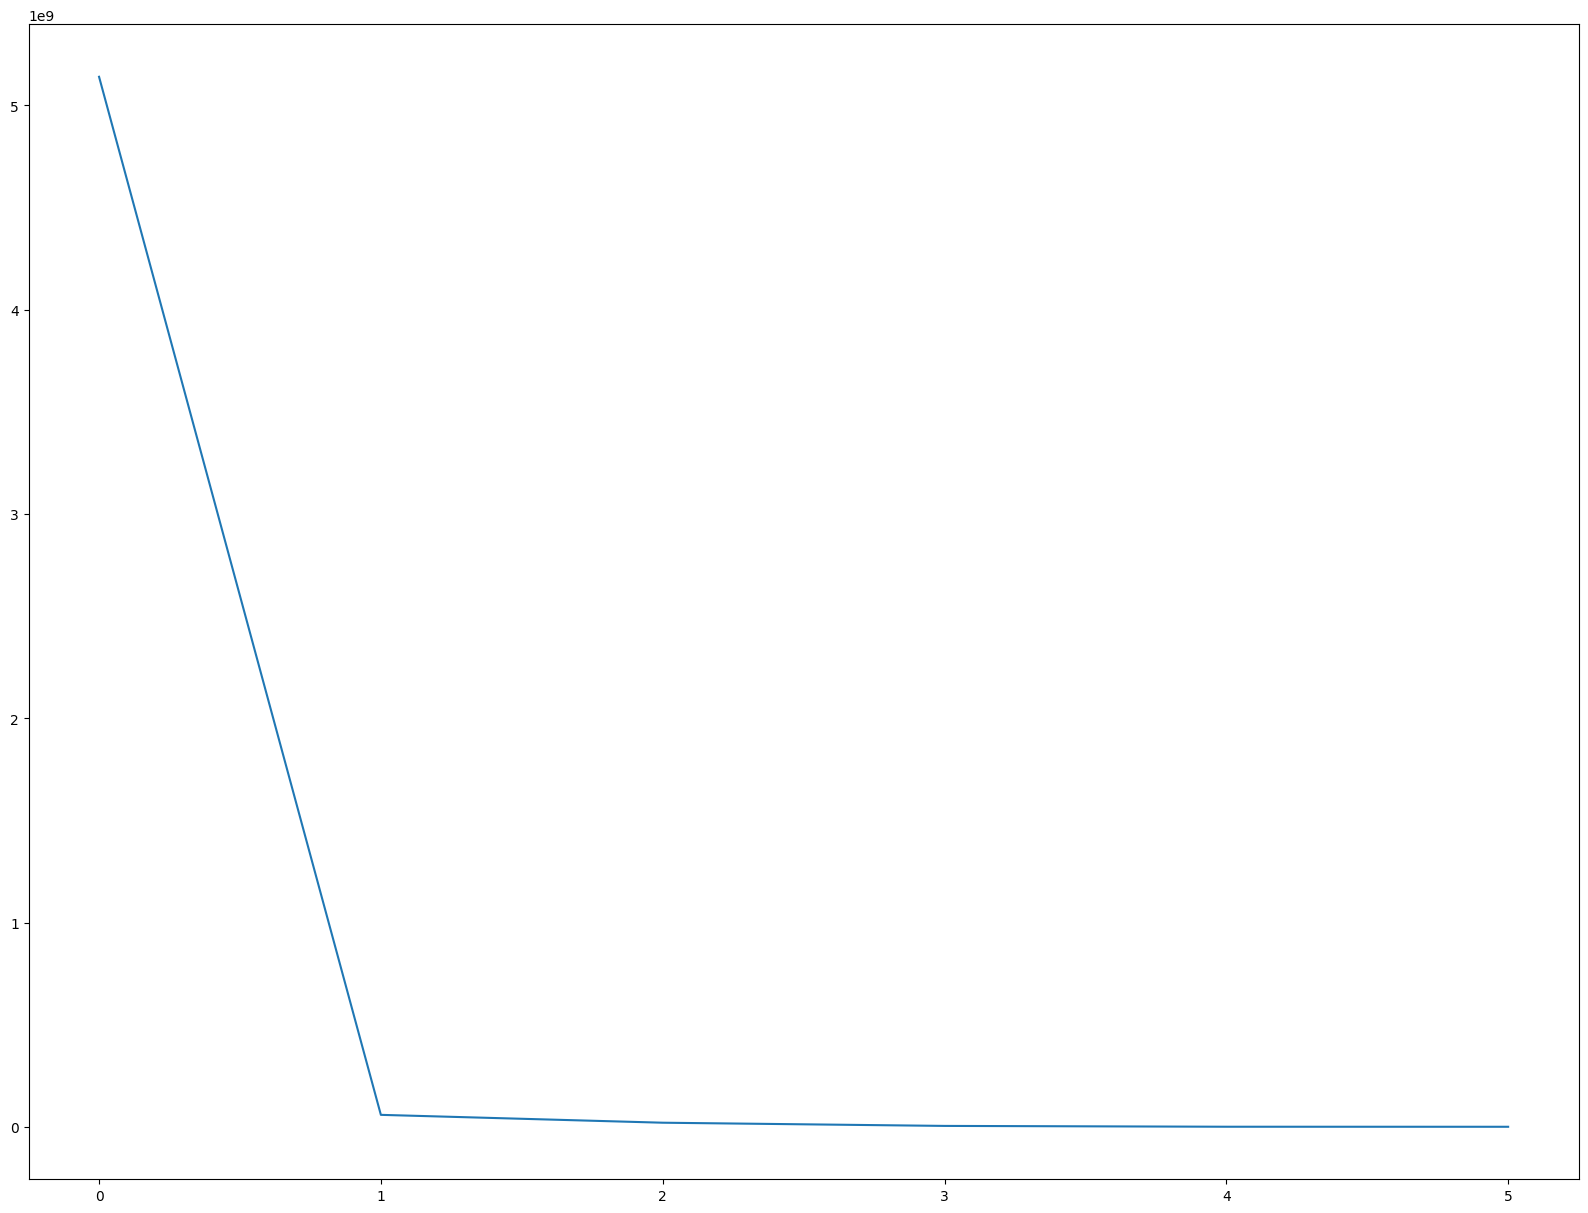

In [13]:
from sklearn.decomposition import PCA
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(cluster_data)

# the covariance matrix
print(pca.components_)

plt.plot(pca.explained_variance_)

In [14]:
pca.n_components = 2
dataset_reduced = pca.fit_transform(cluster_data)
dataset_reduced[0:5]

array([[-31549.07852583,   6778.23511621],
       [-32705.27697891,   6692.00269869],
       [-35526.54363325,   7867.69354184],
       [-19902.18269555,   3182.79958452],
       [159883.17562865, -11075.76881217]])

In [15]:
k = 10
kmeans = KMeans(n_clusters=k).fit(dataset_reduced)
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-17281.13686693,   1172.18464748],
       [863703.05347521,  59476.01098392],
       [ 91887.25471864, -16641.69429968],
       [507708.48668372,  17831.35221835],
       [ 40181.05617048, -10221.12239004],
       [154301.77864793, -16701.68430432],
       [  2972.17973702,  -4003.94487021],
       [-29836.65736457,   5700.16619191],
       [616434.84073548,  28531.26923662],
       [312857.48520935, -10303.43314532]])

In [16]:
predictions = kmeans.predict(dataset_reduced).tolist()
df_predictions = pd.DataFrame({"cluster" : predictions})

unsupervised_data_w_cluster = pd.DataFrame(dataset_reduced)
unsupervised_data_w_cluster = unsupervised_data_w_cluster.assign(cluster = df_predictions.values)
unsupervised_data_w_cluster = unsupervised_data_w_cluster.assign(gm_naam = data_for_selected_region_type['gm_naam'].values)

unsupervised_data_w_cluster.head(4)

0            1  cluster     gm_naam
0 -31549.078526  6778.235116        7  Appingedam
1 -32705.276979  6692.002699        7       Bedum
2 -35526.543633  7867.693542        7    Ten Boer
3 -19902.182696  3182.799585        0    Delfzijl

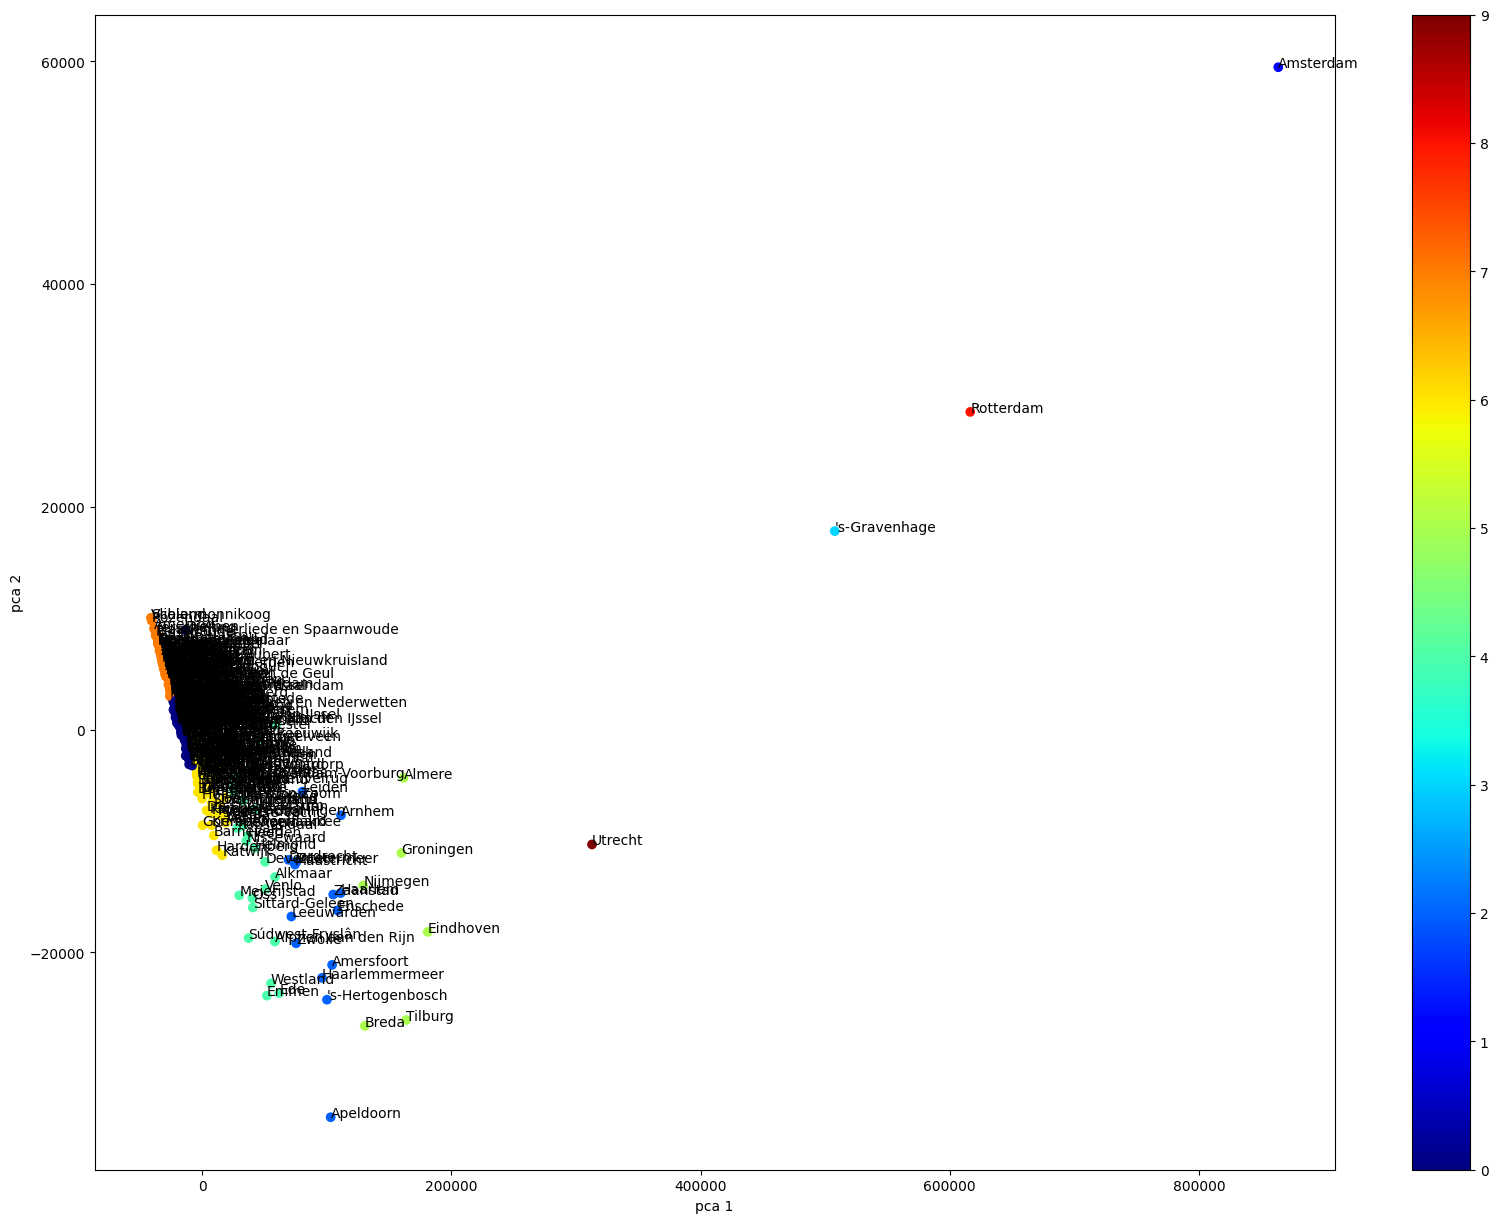

In [17]:
plt.scatter(unsupervised_data_w_cluster[0], unsupervised_data_w_cluster[1], c=unsupervised_data_w_cluster['cluster'], cmap=cm.jet)
plt.colorbar()
plt.xlabel('pca 1')
plt.ylabel('pca 2')

# comment out for not showing labels
for i, txt in enumerate(unsupervised_data_w_cluster['gm_naam']):
    x_co = unsupervised_data_w_cluster.iloc[i][0]
    y_co = unsupervised_data_w_cluster.iloc[i][1]
    plt.annotate(txt, (x_co, y_co))

## Another example with image data

In [18]:
# the latest scikit-learn can have issues with the internal joblib so it needs to use another module
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

# because the joblib is altered, the string is decoded twice, therefore it needs double quotation
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [19]:
n_rows = 3
n_columns = 3
n_components = n_rows * n_columns

In [20]:
trainX = data.data
trainX.shape

(400, 4096)

In [21]:
trainX = (trainX - trainX.mean()) / trainX.std()
trainX = trainX.reshape(400, -1)
trainX.shape

(400, 4096)

In [22]:
pca = PCA(n_components=n_components, svd_solver='randomized')
transformed_X = pca.fit(trainX)
transformed_X

PCA(n_components=9, svd_solver='randomized')

In [23]:
transformed_X.components_[:n_components]

array([[-0.00419108, -0.0071095 , -0.0093361 , ...,  0.00018515,
         0.00337965,  0.00318825],
       [-0.02859143, -0.03328837, -0.0378465 , ...,  0.02962785,
         0.02721301,  0.02488901],
       [ 0.00135687, -0.00032573, -0.00019796, ..., -0.01541365,
        -0.01370979, -0.01188342],
       ...,
       [-0.04561988, -0.03917336, -0.03021737, ..., -0.02310411,
        -0.02407061, -0.02130057],
       [-0.00679675, -0.00338331,  0.00280007, ...,  0.0040128 ,
         0.00404567,  0.00015201],
       [-0.02530735, -0.03562494, -0.03821423, ...,  0.02711065,
         0.02856999,  0.02668156]], dtype=float32)

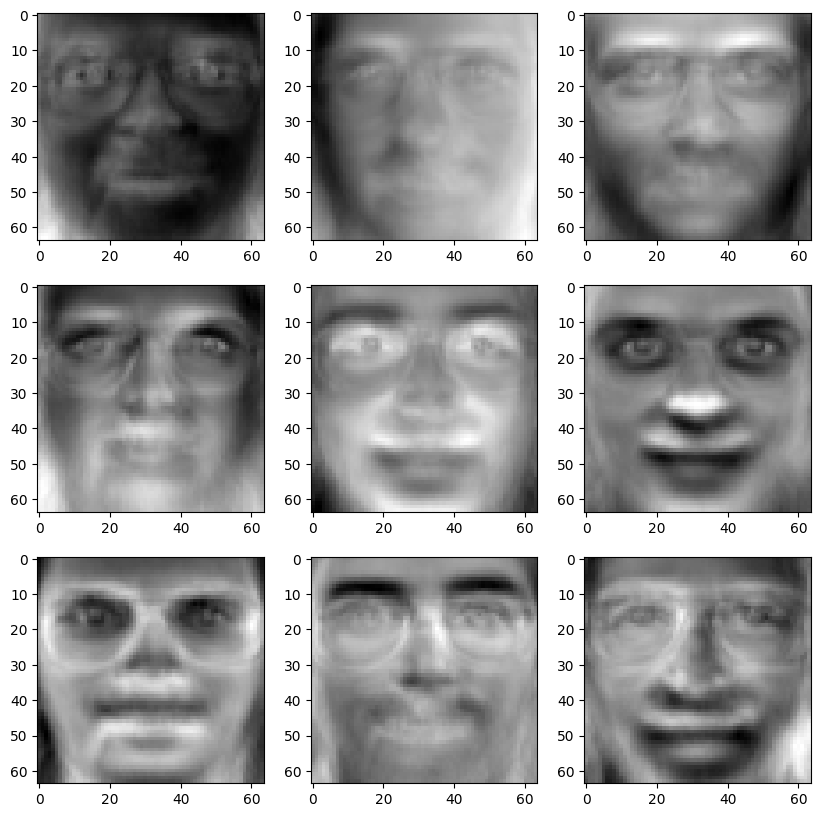

In [24]:
_, ax = plt.subplots(n_rows, n_columns, figsize=(10,10))

i = 0
for r in range(n_rows):
    for c in range(n_columns):
        ax[r,c].imshow(transformed_X.components_[i].reshape(64, 64), cmap="gray")
        i += 1